In [1]:
pip install numpy matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = load_breast_cancer()

X = data.data
y = data.target

print("Dataset Shape:", X.shape)

Dataset Shape: (569, 30)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
svm_linear = SVC(kernel='linear')

svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear SVM Accuracy:",
      accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193


In [7]:
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:",
      accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9824561403508771


In [8]:
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:",
      accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9824561403508771


In [13]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

In [ ]:
scores = cross_val_score(SVC(kernel='rbf'), X, y, cv=5)

print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [15]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

model = SVC(kernel='rbf')
model.fit(X_train_p, y_train_p)

SVC()

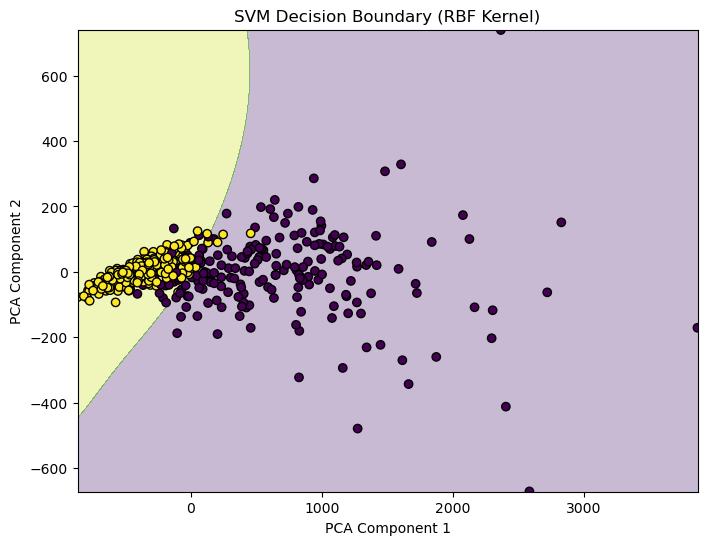

In [16]:
# SAFE STEP SIZE (IMPORTANT)
h = 0.5

x_min, x_max = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
y_min, y_max = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolors='k')

plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()